In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df1 = pd.read_csv("ENB2012_data.csv")

In [6]:
#Renaming the colunms
df1.rename(columns = {'X1' : 'Relative Compactness', 'X2' : 'Surface Area', 'X3' : 'Wall Area', 'X4' : 'Roof Area', 'X5' : 'Overall Height',
                      'X6' : 'Orientation', 'X7' : 'Glazing Area', 'X8' : 'Glazing Area Distribution', 'Y1' : 'Heating Load', 'Y2' : 'Cooling Load'},
           inplace = True)
           

In [7]:
print(df1.head())

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0          2.0           0.0                        0.0         15.55   
1          3.0           0.0                        0.0         15.55   
2          4.0           0.0                        0.0         15.55   
3          5.0           0.0                        0.0         15.55   
4          2.0           0.0                        0.0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

In [8]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    float64
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    float64
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(10)
memory usage: 101.4 KB
None


In [9]:
print(df1.describe())

       Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

In [10]:
df1.isnull().sum()

Relative Compactness         528
Surface Area                 528
Wall Area                    528
Roof Area                    528
Overall Height               528
Orientation                  528
Glazing Area                 528
Glazing Area Distribution    528
Heating Load                 528
Cooling Load                 528
dtype: int64

In [11]:
df1

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Removing Rows with nan values
df2 = df1.dropna()

In [13]:
#Removing all the nan values.
df2.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [14]:
df2    #df2 is filtered dataset

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0,16.48,16.61


In [19]:
#Exploring correlation with Cooling load
correlation = df2.corr()
Cooling_load_relation = correlation["Cooling Load"].sort_values(ascending=False)
df2.shape, Cooling_load_relation
#this gives correlation of all other features with cooling load . Number close to 1 is positive coreelation and
#close to 0 or negative value is negative or no coreelation

((768, 10),
 Cooling Load                 1.000000
 Heating Load                 0.975862
 Overall Height               0.895785
 Relative Compactness         0.634339
 Wall Area                    0.427117
 Glazing Area                 0.207505
 Glazing Area Distribution    0.050525
 Orientation                  0.014290
 Surface Area                -0.672999
 Roof Area                   -0.862547
 Name: Cooling Load, dtype: float64)

In [20]:
# Use only numeric columns to calculate the correlation
numeric_data = df2.select_dtypes(include=['float64', 'int64']).columns
df2[numeric_data].corr()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing Area Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


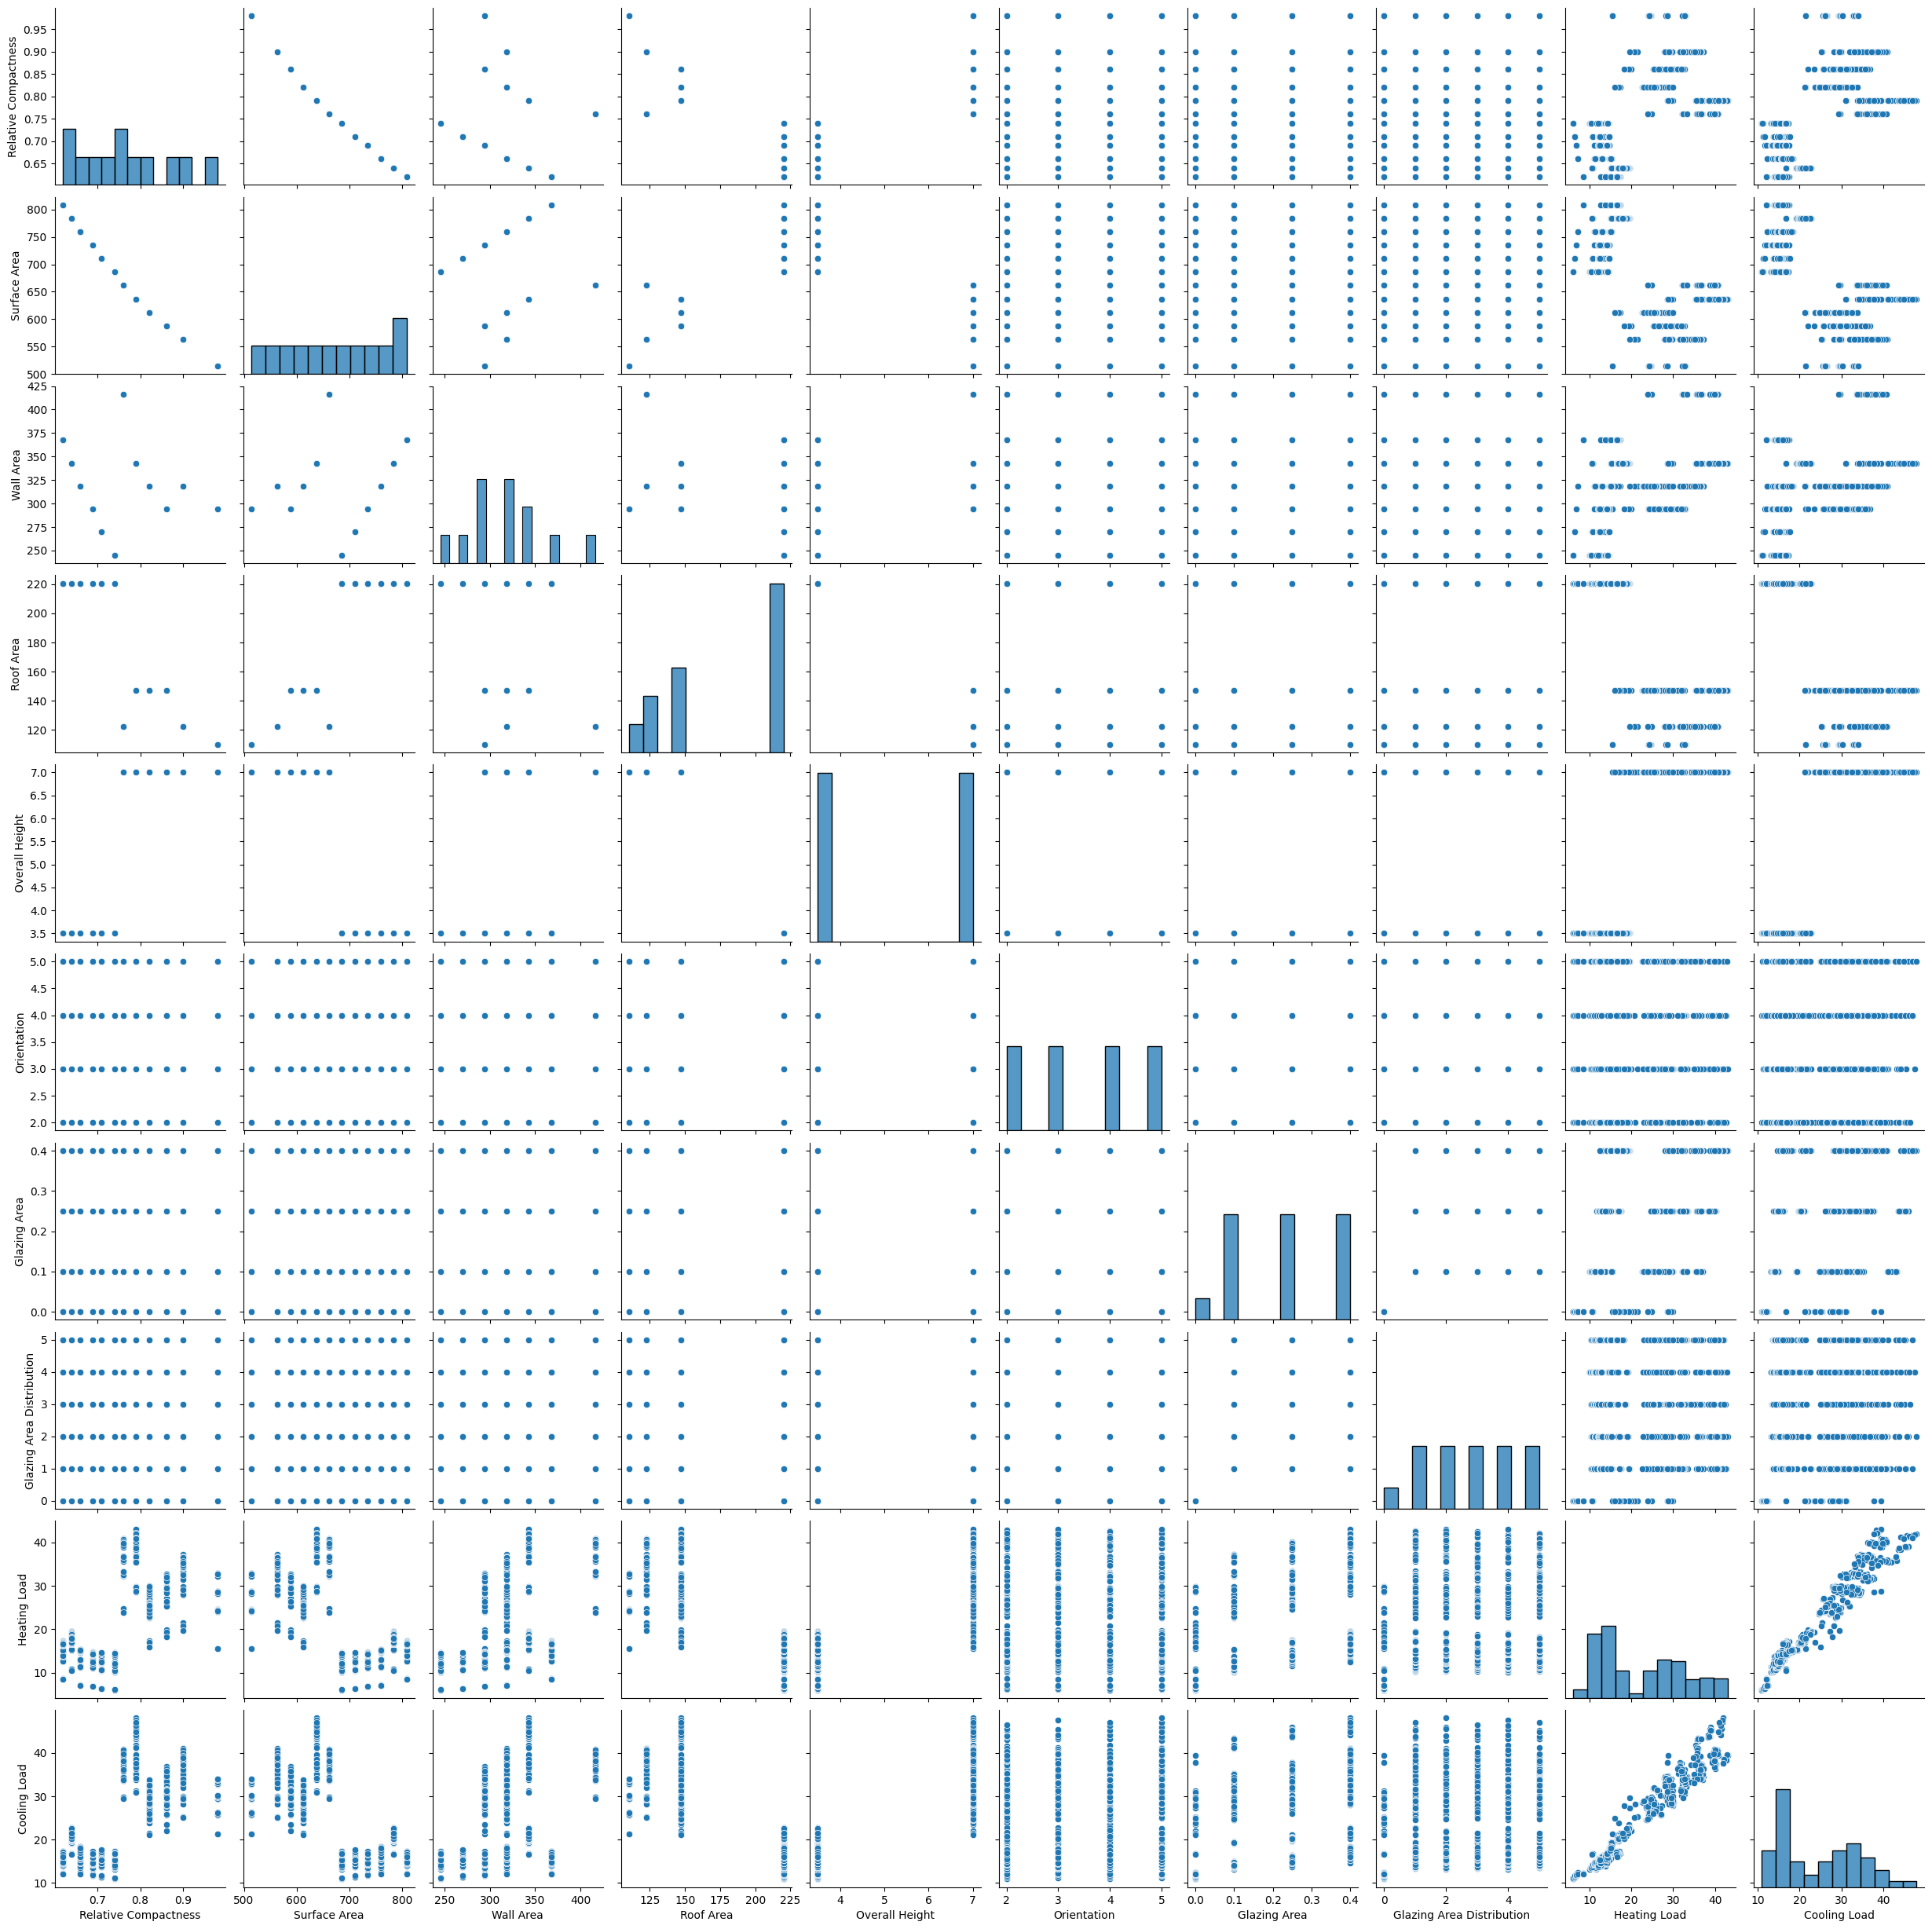

In [17]:
#Using a pair wise plot to analyse correlation of datas with each other.
sns.pairplot(df2)

<Axes: xlabel='Heating Load', ylabel='Density'>

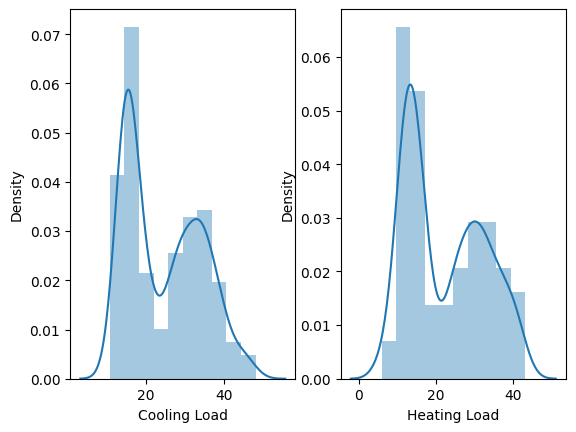

In [21]:
plt.subplot(1,2,1)
sns.distplot(df2["Cooling Load"])
plt.subplot(1,2,2)
sns.distplot(df2["Heating Load"])

In [22]:
df2["Cooling Load"].skew()

np.float64(0.39599246696276713)

In [23]:
df2["Cooling Load"].describe()

count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Cooling Load, dtype: float64

<Axes: ylabel='Cooling Load'>

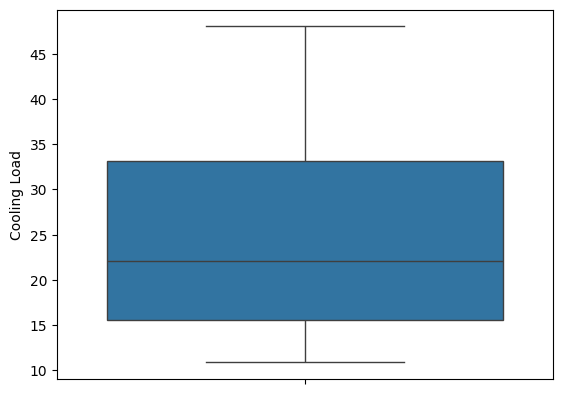

In [24]:
sns.boxplot(df2["Cooling Load"])

In [25]:
percentile25 = df2["Cooling Load"].quantile(0.25)
percentile75 = df2["Cooling Load"].quantile(0.75)

In [26]:
IQR = percentile75 - percentile25
IQR

np.float64(17.5125)

In [27]:
min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR

In [28]:
#trimming
data_new = df2[(df2["Cooling Load"]>min) & (df2["Cooling Load"]<max)]

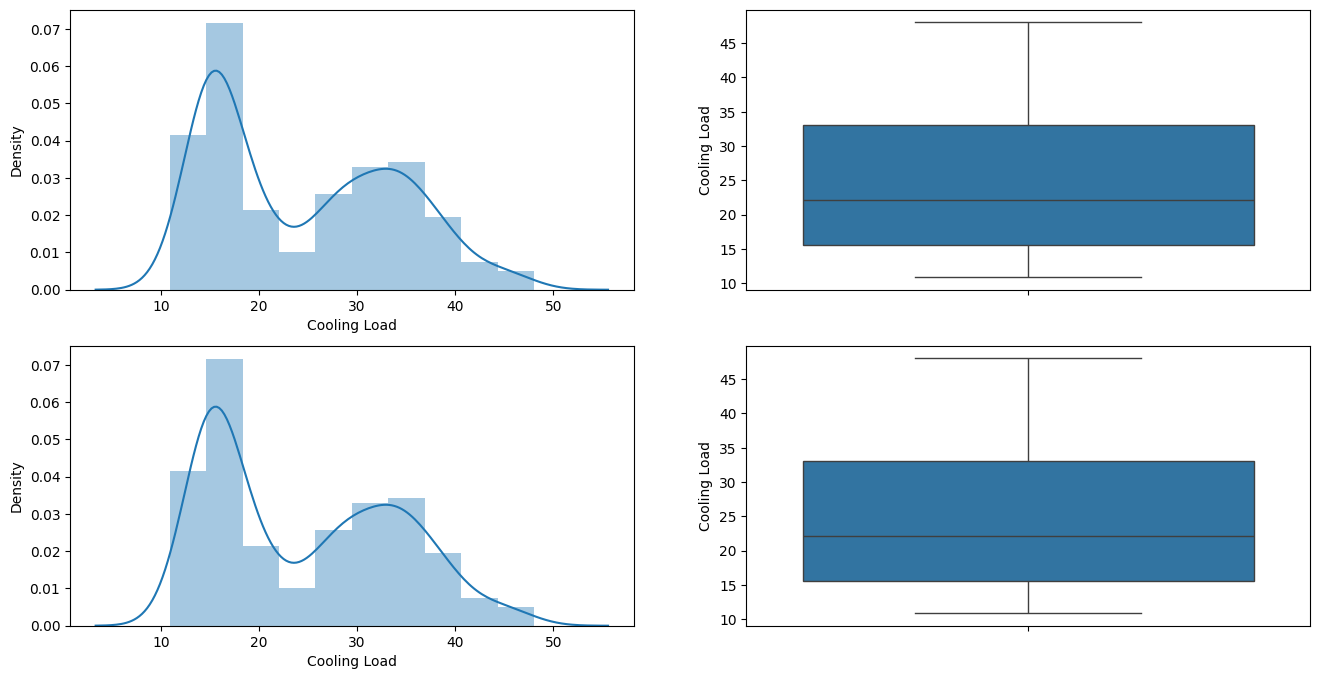

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2["Cooling Load"])

plt.subplot(2,2,2)
sns.boxplot(df2["Cooling Load"])

plt.subplot(2,2,3)
sns.distplot(data_new["Cooling Load"])

plt.subplot(2,2,4)
sns.boxplot(data_new["Cooling Load"])

plt.show()

In [30]:
df2["Heating Load"].skew()

np.float64(0.36044888646213086)

In [31]:
df2["Heating Load"].describe()

count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Heating Load, dtype: float64

<Axes: ylabel='Heating Load'>

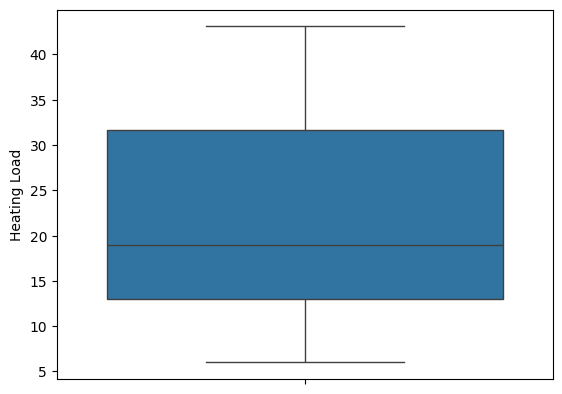

In [43]:
sns.boxplot(df2["Heating Load"])

There is no potential outliers in the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building.

(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [44]:
df2.shape

(768, 10)

In [45]:
# Cooling Load is treated as output. 
df3_1 = df2.drop(["Cooling Load"], axis=1)
df3_2 = df2["Cooling Load"]

df3_1_train, df3_1_test, df3_2_train, df3_2_test = train_test_split(df3_1,df3_2, test_size=0.2, random_state=42)
df3_2_train = df3_2_train.values.reshape(-1, 1)
df3_2_test = df3_2_test.values.reshape(-1, 1)

#Display the shapes of the testing and training datasets
print("shape of original dataset :", df2.shape)
print("shape of input - training set",df3_1_train.shape)
print("shape of output - training set", df3_2_train.shape)
print("shape of input - testing set", df3_1_test.shape)
print("shape of output - testing set", df3_2_test.shape)

shape of original dataset : (768, 10)
shape of input - training set (614, 9)
shape of output - training set (614, 1)
shape of input - testing set (154, 9)
shape of output - testing set (154, 1)


(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib.

In [46]:
linearreg = LinearRegression()
linearreg.fit(df3_1_train, df3_2_train)

LinearRegression()

In [47]:
linearreg.coef_

array([[-1.62447657e+01,  2.47858536e+09, -2.47858536e+09,
        -4.95717073e+09,  3.91277701e-01,  8.39596956e-02,
        -3.06576012e+00, -1.53365197e-01,  8.86321053e-01]])

In [48]:
linearreg.intercept_

array([29.93056367])

In [49]:
predicted_value1 = linearreg.predict(df3_1_test)

In [50]:
print(df3_2_test.shape, predicted_value1.shape)

(154, 1) (154, 1)


In [51]:
from sklearn.metrics import mean_squared_error
cost1 = mean_squared_error(df3_2_test, predicted_value1)
r2_manual =r2_score(df3_2_test, predicted_value1) 
rmse_manual = np.sqrt(cost1)

In [52]:
cost1,r2_manual,rmse_manual

(np.float64(4.1602385626839595),
 0.9551007702819186,
 np.float64(2.03966628708815))

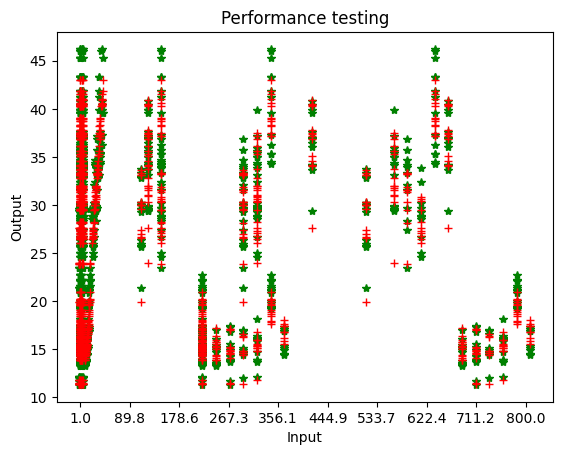

In [53]:
plt.plot(df3_1_test, df3_2_test, "*", color = "green")
plt.plot(df3_1_test, predicted_value1, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 800, 10))
plt.ylabel("Output")
plt.show()

(iii) Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

In [54]:
linear_regressor = LinearRegression()

In [55]:
linear_regressor.fit(df3_1, df3_2)

LinearRegression()

In [56]:
linear_regressor.coef_

array([-1.46807857e+01,  1.95066328e+10, -1.95066328e+10, -3.90132656e+10,
        6.69823736e-01,  1.41705671e-01, -2.55765297e+00, -1.35900878e-01,
        8.66658807e-01])

In [57]:
linear_regressor.intercept_

np.float64(24.48782717871372)

In [58]:
predicted_value2 = linear_regressor.predict(df3_1_train)

In [59]:
print(df3_2_train.shape,predicted_value2.shape)

(614, 1) (614,)


In [60]:
from sklearn.metrics import mean_squared_error
cost2 = mean_squared_error(df3_2_train, predicted_value2)
r2_sk =r2_score(df3_2_train, predicted_value2) 
rmse_sk = np.sqrt(cost2)

In [61]:
cost2,r2_sk,rmse_sk

(np.float64(3.6664129948746313),
 0.9591071560726848,
 np.float64(1.9147879764805897))

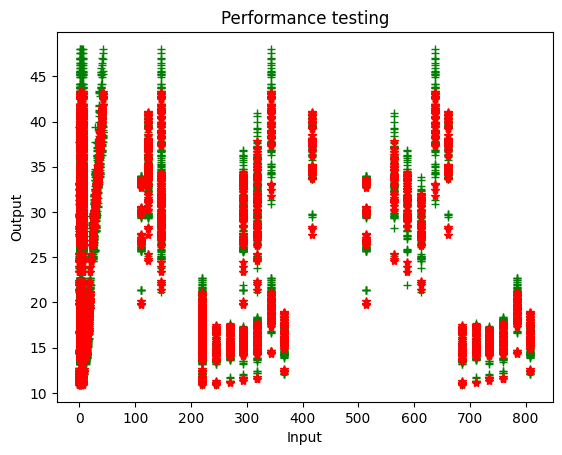

In [62]:
plt.plot(df3_1, df3_2, '+', color = "green")
plt.plot(df3_1_train, predicted_value2, '*', color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [63]:
df3_2

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Cooling Load, Length: 768, dtype: float64

In [64]:
predicted_value2

array([27.12585928, 20.42542769, 31.7823121 , 34.53757555, 14.8025534 ,
       33.78893298, 36.99960875, 41.11077818, 18.24306061, 18.31265181,
       18.88205282, 17.82132356, 27.6921305 , 34.18677348, 33.66612947,
       15.19178437, 12.29837952, 35.03913937, 13.75426962, 33.09878886,
       15.28648816, 41.38523947, 15.07435515, 16.35265016, 34.92029594,
       34.11992957, 11.06885538, 16.82467918, 36.62970999, 16.47702265,
       34.11549879, 17.88467301, 29.90009567, 17.30662357, 16.1439424 ,
       43.08720672, 24.80031834, 17.66102885, 37.27252529, 14.40491245,
       39.5734761 , 40.39946923, 26.8347173 , 14.8567227 , 30.48158426,
       14.66657132, 17.45027913, 35.28048678, 18.23743428, 31.61478513,
       14.33331734, 31.54975238, 27.18062334, 29.80190141, 29.42713975,
       16.01002763, 30.00986424, 16.78229019, 16.76403311, 33.15116138,
       10.87624055, 15.51824518, 31.20868901, 32.18087789, 28.25341639,
       16.343261  , 27.39470198, 14.83931605, 27.55459557, 39.67

In [65]:
from sklearn.linear_model import Ridge
alpha = 0.1
ridge = Ridge(alpha=alpha)
ridge.fit(df3_1,df3_2)

Ridge(alpha=0.1)

In [66]:
# Make predictions on the testing set
prediction_ridge = ridge.predict(df3_1)


In [67]:
from sklearn.metrics import mean_squared_error
# Calculate the mean squared error
cost_ridge = mean_squared_error(df3_2, prediction_ridge)
r2_ridge=r2_score(df3_2, prediction_ridge)
rmse_ridge = np.sqrt(cost_ridge)

In [68]:
cost_ridge,r2_ridge,rmse_ridge

(np.float64(3.748102866684309),
 0.958531868685738,
 np.float64(1.9360017734197221))

In [69]:
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(df3_1,df3_2)

Lasso(alpha=0.1)

In [70]:
prediction_lasso = lasso.predict(df3_1)

In [71]:
from sklearn.metrics import mean_squared_error
# Calculate the mean squared error
cost_lasso = mean_squared_error(df3_2, prediction_lasso)
r2_lasso=r2_score(df3_2, prediction_lasso)                                                               
rmse_lasso = np.sqrt(cost_lasso)

In [72]:
cost_lasso, r2_lasso, rmse_lasso

(np.float64(3.919563008806769),
 0.9566348738748709,
 np.float64(1.9797886273051395))

(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

In [73]:
# Calculated metrics
print("For Manual Model")
print("MSE:", cost1)
print("R²:", r2_manual)
print("RMSE:", rmse_manual)

print("\nFor Model using Sklearn")
print("MSE:", cost2)
print("R²:", r2_sk)
print("RMSE:", rmse_sk)

print("\nFor ridge Model")
print("MSE:", cost_ridge)
print("R²:", r2_ridge)
print("RMSE:", rmse_ridge)

print("\nFor lasso Model")
print("MSE:", cost_lasso)
print("R²:", r2_lasso)
print("RMSE:", rmse_lasso)



For Manual Model
MSE: 4.1602385626839595
R²: 0.9551007702819186
RMSE: 2.03966628708815

For Model using Sklearn
MSE: 3.6664129948746313
R²: 0.9591071560726848
RMSE: 1.9147879764805897

For ridge Model
MSE: 3.748102866684309
R²: 0.958531868685738
RMSE: 1.9360017734197221

For lasso Model
MSE: 3.919563008806769
R²: 0.9566348738748709
RMSE: 1.9797886273051395


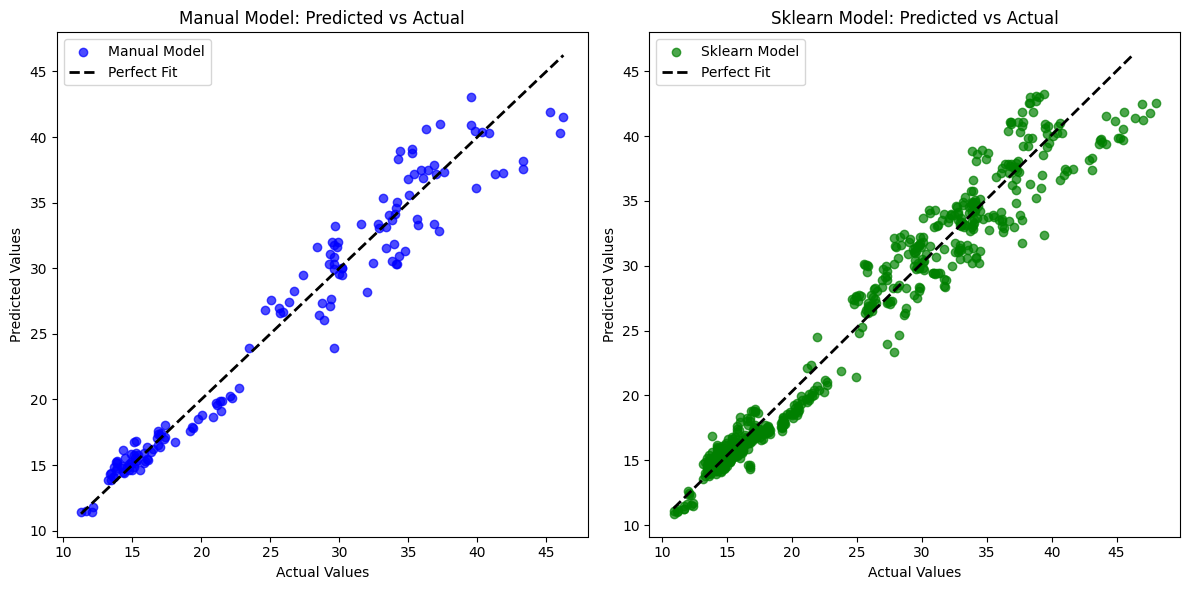

In [74]:
# Plot Predicted vs Actual values
plt.figure(figsize=(12, 6))

# Manual model plot
plt.subplot(1, 2, 1)
plt.scatter(df3_2_test, predicted_value1, alpha=0.7, color='blue', label='Manual Model')
plt.plot([df3_2_test.min(), df3_2_test.max()], [df3_2_test.min(), df3_2_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.title("Manual Model: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

# Sklearn model plot
plt.subplot(1, 2, 2)
plt.scatter(df3_2_train, predicted_value2, alpha=0.7, color='green', label='Sklearn Model')
plt.plot([df3_2_train.min(), df3_2_test.max()], [df3_2_test.min(), df3_2_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.title("Sklearn Model: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

We had taken Cooling Load as the output. Now Identifying the building design elements that most significantly affect or increase cooling requirements. From the correlation analysis of the dataset, the following features exhibit strong relationships with Cooling Load-
1) Overall height (0.895785) - Stong positive correlation 
2) Relative Compactness (0.634339) - Positive correlation
3) Glazing Area (0.207505) - weakely positive correlation
4) Surface Area (-0.672999) - negative correlation
5) Wall Area (0.427117) - moderate correlation

Improvement Sugrestions - 
1) Taller buildings have higher cooling loads.Minimize unnecessary height in building design, especially in hot climates.
 Use reflective roofing materials and cool roof coatings to reduce solar heat gain on the upper floors.
2) Compact designs can slightly increase cooling loads due to reduced heat dissipation.Design for moderate compactness while incorporating natural       ventilation features. Use materials with low thermal mass in compact structures to minimize heat retention.
3)  Reduce Surface Area: Larger external surface areas increase cooling demands. Simplify building shapes to minimize surface area.
 Enhance insulation and use light-colored exterior finishes to reflect sunlight.

